In [1]:
from __future__ import print_function
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
import os
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dense
from keras.layers import Dropout
from keras.optimizers import RMSprop, SGD, Adam
import matplotlib.pyplot as plt
import cv2
import matplotlib.image as mpimg
import numpy as np
import pandas as pd
import tensorflow as tf
from keras.regularizers import l1
import random

Using TensorFlow backend.


In [2]:
IMAGE_DIR = 'dataset\images'

trainDf = pd.read_csv('dataset/train.csv')
testDf = pd.read_csv('dataset/test.csv')
trainDf

,image_id,healthy,multiple_diseases,rust,scab
0,Train_0,0,0,0,1
1,Train_1,0,1,0,0
2,Train_2,1,0,0,0
3,Train_3,0,0,1,0
4,Train_4,1,0,0,0
...,...,...,...,...,...
1816,Train_1816,0,0,0,1
1817,Train_1817,1,0,0,0
1818,Train_1818,1,0,0,0
1819,Train_1819,0,0,1,0


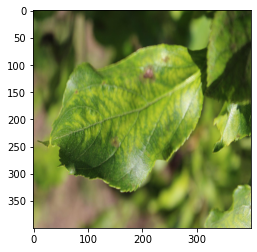

In [3]:
img=mpimg.imread('dataset/images/Train_0.jpg')
img = cv2.resize(img, (400,400))
imgplot = plt.imshow(img)
plt.show()

In [4]:
Batches = list(trainDf['image_id'])
x,y=[],[]
print(len(Batches))
for i in Batches:
    imagePath = "dataset/images/" + i + ".jpg"
    img=cv2.imread(imagePath)
    img = cv2.resize(img, (200,200))
    img=img/255
    labelsDf = trainDf[trainDf['image_id']==i]
    labels = [int(labelsDf['healthy']),int(labelsDf['multiple_diseases']),int(labelsDf['rust']),int(labelsDf['scab'])]
    x.append(img)
    y.append(labels)
c = list(zip(x, y))
random.shuffle(c)
x, y = zip(*c)

1821


In [5]:
y=np.array(y)
x=np.array(x).reshape(1821,200,200,3)

In [6]:
model=Sequential()

model.add(Conv2D(32,(3,3),input_shape=(200,200,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Conv2D(128,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Conv2D(256,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(BatchNormalization())
model.add(Flatten())


model.add(Dense(8, activity_regularizer=l1(0.001)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(4))
model.add(Activation('softmax'))

Train on 1274 samples, validate on 547 samples
Epoch 1/150
1274/1274 [==============================] - 10s 8ms/step - loss: 1.9935 - accuracy: 0.3108 - val_loss: 1.5030 - val_accuracy: 0.3638
Epoch 2/150
1274/1274 [==============================] - 7s 5ms/step - loss: 1.8275 - accuracy: 0.3383 - val_loss: 1.4992 - val_accuracy: 0.3510
Epoch 3/150
1274/1274 [==============================] - 7s 5ms/step - loss: 1.7760 - accuracy: 0.3312 - val_loss: 1.4617 - val_accuracy: 0.3016
Epoch 4/150
1274/1274 [==============================] - 7s 5ms/step - loss: 1.7700 - accuracy: 0.3603 - val_loss: 1.4143 - val_accuracy: 0.3016
Epoch 5/150
1274/1274 [==============================] - 7s 5ms/step - loss: 1.6152 - accuracy: 0.3532 - val_loss: 2.1406 - val_accuracy: 0.3016
Epoch 6/150
1274/1274 [==============================] - 7s 5ms/step - loss: 1.3731 - accuracy: 0.4137 - val_loss: 2.8625 - val_accuracy: 0.3016
Epoch 7/150
1274/1274 [==============================] - 7s 5ms/step - loss: 1.241

Epoch 57/150
1274/1274 [==============================] - 7s 5ms/step - loss: 0.7010 - accuracy: 0.8100 - val_loss: 0.8087 - val_accuracy: 0.7386
Epoch 58/150
1274/1274 [==============================] - 7s 5ms/step - loss: 0.7012 - accuracy: 0.7983 - val_loss: 0.7984 - val_accuracy: 0.7788
Epoch 59/150
1274/1274 [==============================] - 7s 5ms/step - loss: 0.7390 - accuracy: 0.7936 - val_loss: 0.8780 - val_accuracy: 0.7239
Epoch 60/150
1274/1274 [==============================] - 7s 5ms/step - loss: 0.6947 - accuracy: 0.8140 - val_loss: 1.0280 - val_accuracy: 0.5576
Epoch 61/150
1274/1274 [==============================] - 7s 5ms/step - loss: 0.6994 - accuracy: 0.8085 - val_loss: 0.7712 - val_accuracy: 0.7861
Epoch 62/150
1274/1274 [==============================] - 7s 5ms/step - loss: 0.7095 - accuracy: 0.8163 - val_loss: 0.9455 - val_accuracy: 0.6874
Epoch 63/150
1274/1274 [==============================] - 7s 5ms/step - loss: 0.7486 - accuracy: 0.7873 - val_loss: 0.7893 -

1274/1274 [==============================] - 7s 5ms/step - loss: 0.5880 - accuracy: 0.8422 - val_loss: 0.7343 - val_accuracy: 0.7660
Epoch 114/150
1274/1274 [==============================] - 7s 5ms/step - loss: 0.6584 - accuracy: 0.8069 - val_loss: 0.8488 - val_accuracy: 0.7459
Epoch 115/150
1274/1274 [==============================] - 7s 5ms/step - loss: 0.6322 - accuracy: 0.8265 - val_loss: 0.7399 - val_accuracy: 0.7843
Epoch 116/150
1274/1274 [==============================] - 7s 5ms/step - loss: 0.6008 - accuracy: 0.8414 - val_loss: 0.6627 - val_accuracy: 0.8007
Epoch 117/150
1274/1274 [==============================] - 7s 5ms/step - loss: 0.5854 - accuracy: 0.8430 - val_loss: 0.6581 - val_accuracy: 0.8099
Epoch 118/150
1274/1274 [==============================] - 7s 5ms/step - loss: 0.5846 - accuracy: 0.8414 - val_loss: 0.9480 - val_accuracy: 0.6618
Epoch 119/150
1274/1274 [==============================] - 7s 5ms/step - loss: 0.6082 - accuracy: 0.8273 - val_loss: 0.8212 - val_ac

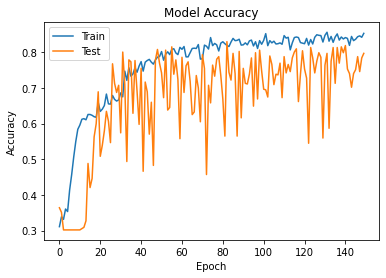

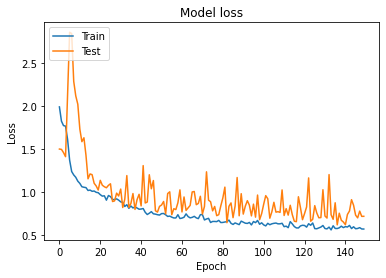

In [7]:

model.compile(loss="categorical_crossentropy",
              optimizer="adam",
              metrics=['accuracy'])

history=model.fit(x,y,epochs=150,verbose=1
                  ,validation_split=0.3)


model.save('plant_pathology.h5')


plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

